In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

In [3]:
c = np.array([1])
t = np.polynomial.chebyshev.chebval2d(x, y, [[1,1],[1,1]])

In [4]:
t.shape

(100, 100)

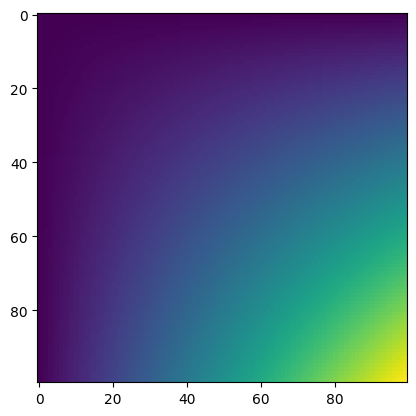

In [5]:
plt.figure()
plt.imshow(t)

In [6]:
np.zeros((1, 1))

array([[0.]])

In [7]:
def plotC(i, j):
    x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    c = np.zeros((i + 1, j + 1))
    c[i, j] = 1
    res = np.polynomial.chebyshev.chebval2d(x, y, c)
    rms = np.mean(res ** 2)
    plt.imshow(res)
    plt.title(f'RMS = {rms:0.4f}')

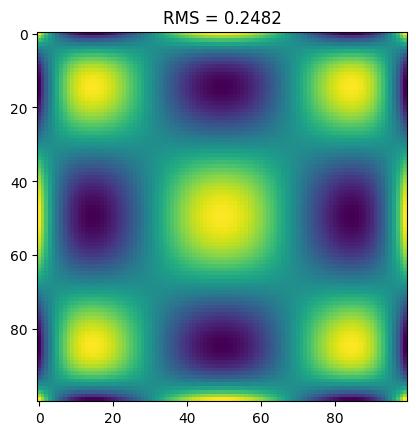

In [8]:
plotC(4, 4)

In [9]:
np.polynomial.chebyshev.chebdomain

array([-1,  1])

In [10]:
def plotCrand(i, j):
    x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    c = np.random.rand(i + 1, j + 1) - 0.5
    res = np.polynomial.chebyshev.chebval2d(x, y, c)
    rms = np.mean(res ** 2)
    plt.imshow(res)
    plt.title(f'RMS = {rms:0.4f}')


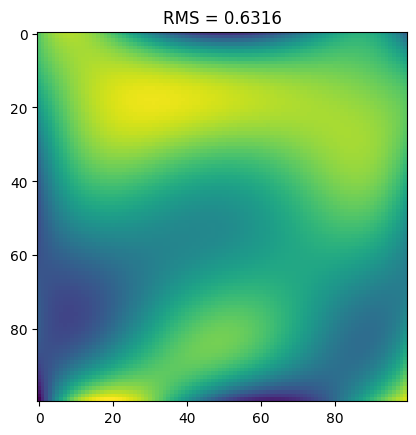

In [11]:
plotCrand(4, 4)

In [12]:
np.random.rand(5,5)

array([[0.88884256, 0.00259829, 0.4863671 , 0.765909  , 0.32755827],
       [0.9865505 , 0.86139011, 0.85743428, 0.81779602, 0.44249949],
       [0.79821049, 0.65883618, 0.36144625, 0.06951882, 0.00259325],
       [0.14741345, 0.90097082, 0.09453409, 0.85032809, 0.64477588],
       [0.71991877, 0.52124093, 0.37867329, 0.69916417, 0.36371229]])

In [13]:
def plotCabb(i, j):
    x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    c = np.zeros((i + 1, j + 1, 30))
    a = np.linspace(-5, 5, 30)
    c[i, j, :] = a
    res = np.polynomial.chebyshev.chebval2d(x, y, c)
    #print(res.shape)
    intens = np.abs(np.mean(np.exp(1j * res), axis=(1, 2))) ** 2
    plt.plot(a, intens)


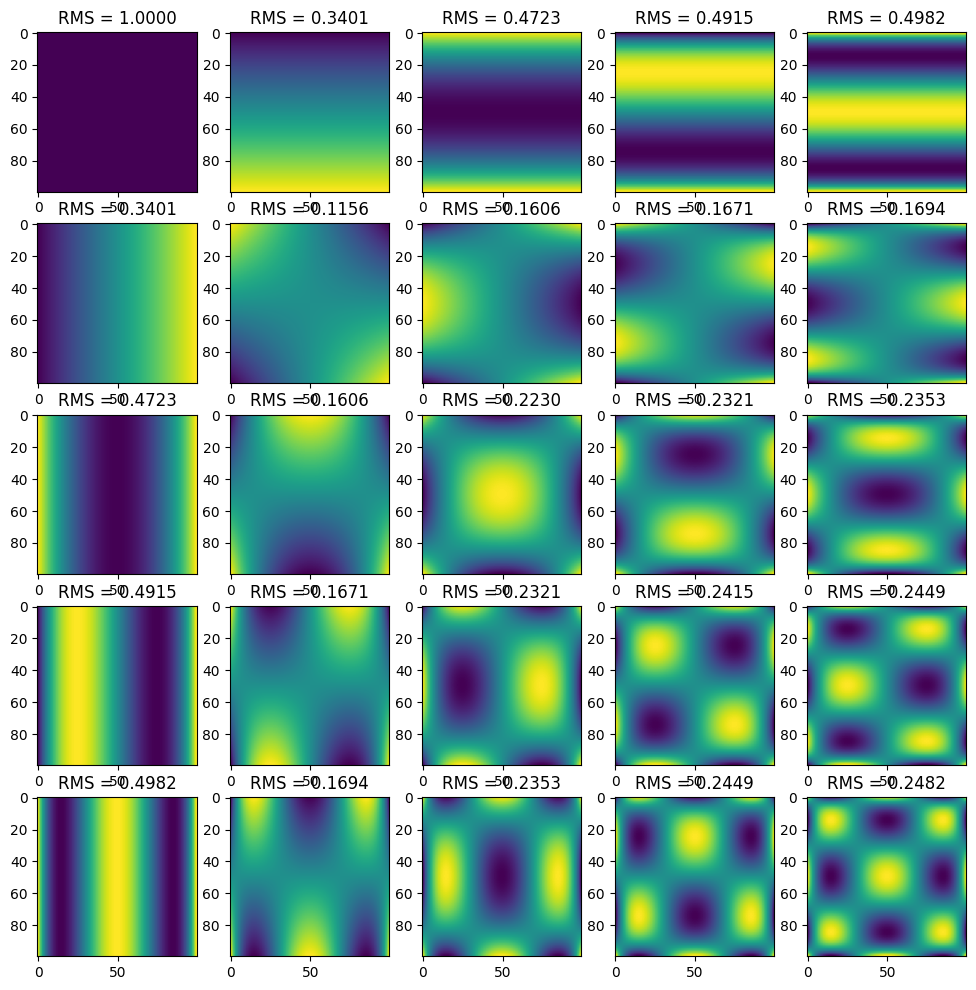

In [14]:
plt.figure(figsize=(12.0, 12.0))
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5, 5), (i, j))
        plotC(i,j)

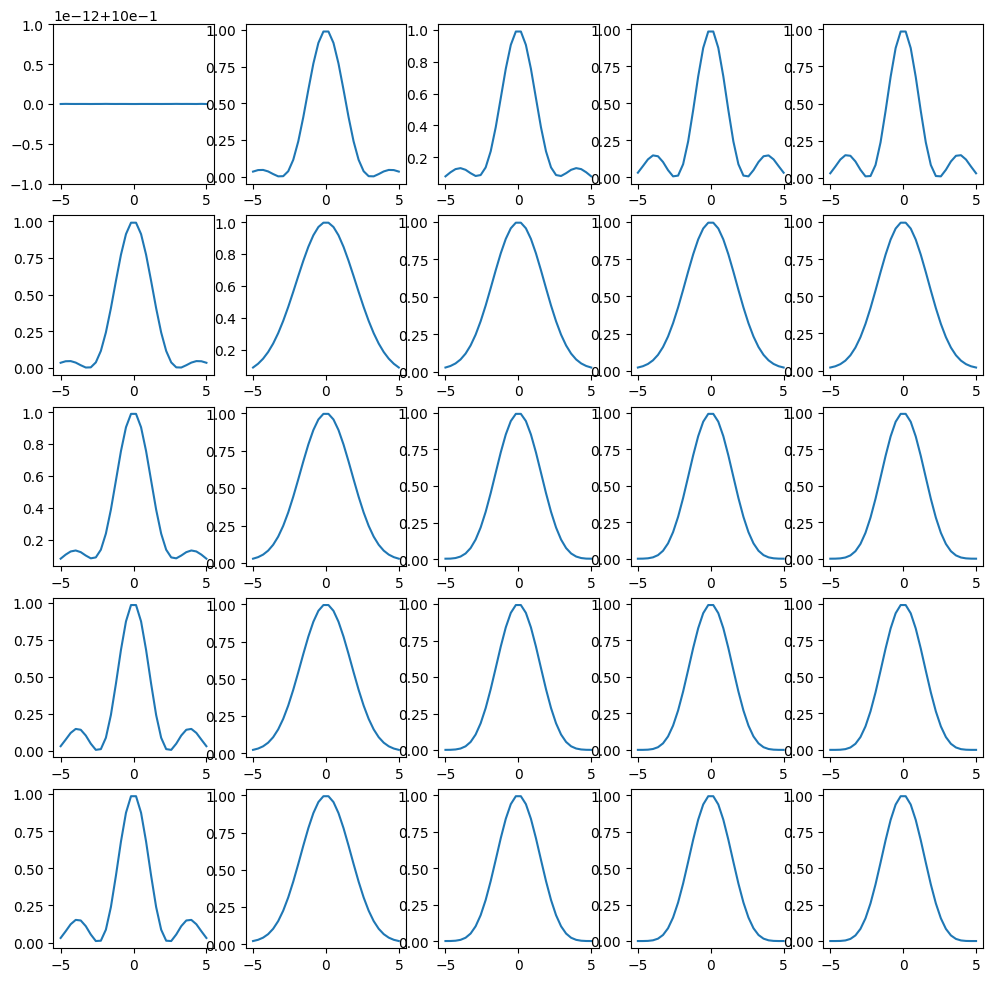

In [15]:
plt.figure(figsize=(12.0, 12.0))
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5, 5), (i, j))
        plotCabb(i,j)

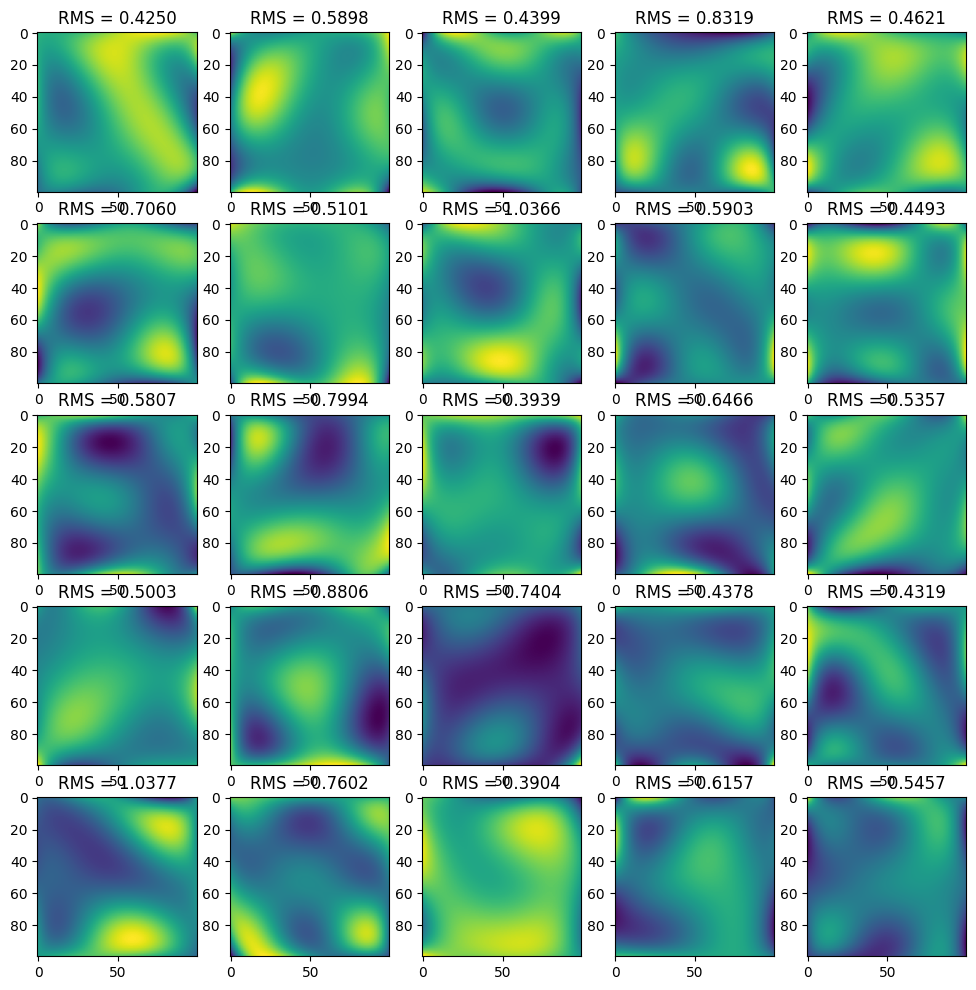

In [16]:
plt.figure(figsize=(12.0, 12.0))
for i in range(5):
    for j in range(5):
        plt.subplot2grid((5, 5), (i, j))
        plotCrand(4,4)

C:\Users\ML2618\AppData\Local\Temp\ipykernel_9900\3166162382.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.imshow(1 / np.sqrt(1 - x ** 2) * 1 / np.sqrt(1 - y ** 2) )


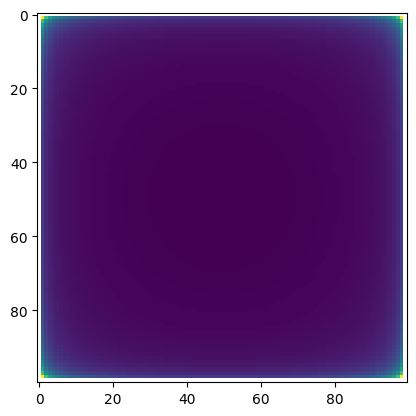

In [17]:
plt.figure()
plt.imshow(1 / np.sqrt(1 - x ** 2) * 1 / np.sqrt(1 - y ** 2) )

In [170]:
np.polynomial.chebyshev.chebweight(np.linspace(-1,1,10))

/usr/local/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1916: RuntimeWarning: divide by zero encountered in true_divide
  w = 1./(np.sqrt(1. + x) * np.sqrt(1. - x))


array([       inf, 1.59099026, 1.20267559, 1.06066017, 1.00623059,
       1.00623059, 1.06066017, 1.20267559, 1.59099026,        inf])

In [195]:
def sumC(i, j, k, l):
    x, y = np.meshgrid(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000))
    c1 = np.zeros((max(i, k) + 1, max(j, l) + 1))
    c1[i, j] = 1
    c2 = np.zeros((max(i, k) + 1, max(j, l) + 1))
    c2[k, l] = 1
    res = np.polynomial.chebyshev.chebval2d(x, y, c1) * np.polynomial.chebyshev.chebval2d(x, y, c2) 
    result = np.mean(res)
    return result

In [202]:
sumC(10, 10, 10, 8)

-0.08338144994447623

In [311]:
def sumC2(i, j, k, l, N):
    # N = 501
    dx = 2 / (N - 1)
    xvals = np.linspace(-1, 1, N)
    x, y = np.meshgrid(xvals, xvals)
    # weights = np.polynomial.chebyshev.chebweight(xvals) * dx
    # weights are calculated for manhatten integration    
    weights = np.zeros(N)
    weights[1:-1] = np.arcsin(xvals[1:-1] + dx / 2) - np.arcsin(xvals[1:-1] - dx / 2)
    corr = np.pi / 2 - np.arcsin(1 - dx / 2)  # correction for singularity at endpoints
    weights[0] = corr
    weights[-1] = corr
    # print(weights)
    # print(np.polynomial.chebyshev.chebweight(xvals) * dx)
    weightM = np.outer(weights, weights) 
    # print(weightM)
    c1 = np.zeros((max(i, k) + 1, max(j, l) + 1))
    c1[i, j] = 1
    c2 = np.zeros((max(i, k) + 1, max(j, l) + 1))
    c2[k, l] = 1
    res = np.polynomial.chebyshev.chebval2d(x, y, c1) * np.polynomial.chebyshev.chebval2d(x, y, c2) * weightM
    result = np.sum(res)
    return result

In [329]:
sumC2(2, 1, 2, 1, 2000) / np.pi ** 2

0.2500090398898825

In [225]:
np.pi ** 2 / 4

2.4674011002723395

In [251]:
xvals = np.linspace(-1, 1, 21)
dx = 2 / 20
w = - np.arcsin(xvals[1:-1] - dx / 2) + np.arcsin(xvals[1:-1] + dx / 2)

In [252]:
w

array([0.2372506 , 0.16792321, 0.14047764, 0.1252202 , 0.1155989 ,
       0.10919424, 0.10489085, 0.10211198, 0.10054742, 0.10004171,
       0.10054742, 0.10211198, 0.10489085, 0.10919424, 0.1155989 ,
       0.1252202 , 0.14047764, 0.16792321, 0.2372506 ])

In [253]:
np.zeros(2)

array([0., 0.])